<h1>Loan Eligibility Prediction </h1>

Main objectives:
- Understand factors affecting the loan approval
- Read csv file 
- Visualize data and relationship between features (numerical vs categorical)
- Boxplot, countplot, distribution plot, stacked bar plot, and heatmap
- Data cleaning (encode categorical features and fill null values by mode and median)
- Using sklearn
- Fit the following ML models (Logistic Regression, Decision Tree, Linear Discriminant Analysis, Random Forest Classifier, Support Vector Classifier, KNeighbors Classifier, and Naive Bayes)

 

## Import data

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Categorical features : Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status,  Credit_History, Loan_Amount_Term

Numerical features: ApplicantIncome, CoapplicantIncome, LoanAmount


In [ ]:
train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Visualize data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


LoanAmount, ApplicantIncome, and CoapplicantIncome (numerical features) have no significant affect Loan_Status. LoanAmount and ApplicantIncome somewhat relate to each other. The proof shown below:

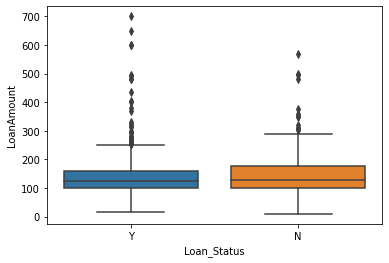

In [ ]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = train) 

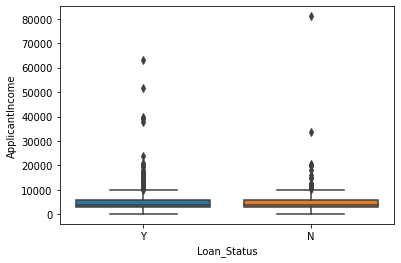

In [ ]:
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = train) 

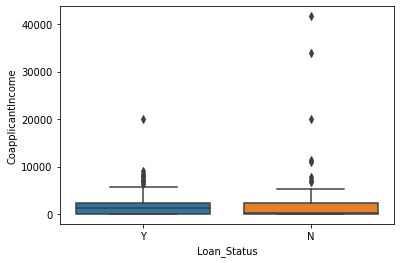

In [ ]:
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = train) 

In [ ]:
corre = train.corr()
corre

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


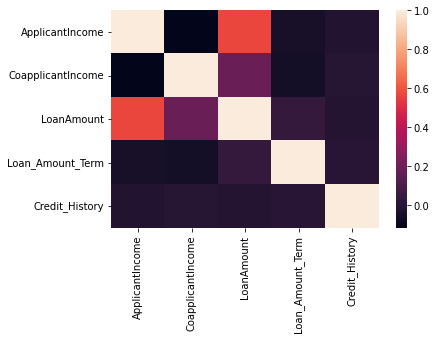

In [ ]:
sns.heatmap(corre)

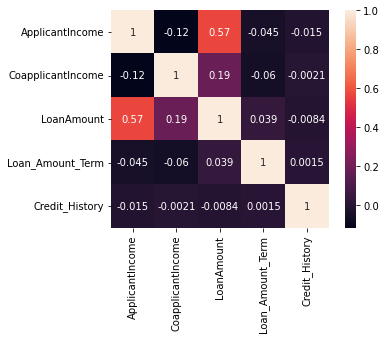

In [ ]:
sns.heatmap(corre,square=True,annot=True)

Visualize the plot between Loan_Status and categorical features (Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status, Credit_History, Loan_Amount_Term)
- There are more men than women in the dataset
- Married people usually have higher chance of loan approval. It could be CoapplicantIncome increasing the chance of getting approval. 
- Majority has 0 dependent and likely to be accepted
- Graduates more likely get approved for the loan. Getting degree could have a higher income.
- There are less self-employed people. Not self-employed people could have stable income 
- Semiurban are likely to be granted loan
- People with credit history are likely to be granted loan
- People usually take loan for 360 months 


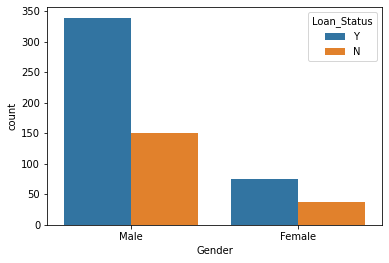

In [ ]:
sns.countplot(x='Gender',data=train, hue='Loan_Status')

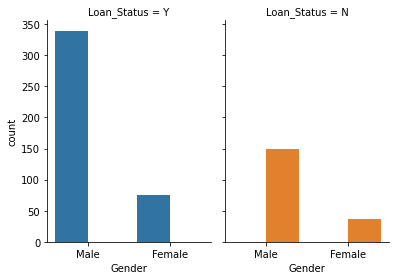

In [ ]:
sns.catplot(x="Gender", hue="Loan_Status", col="Loan_Status",
                data=train, kind="count",
                height=4, aspect=.7);

Create function for graphing multiple plot (using subplot)

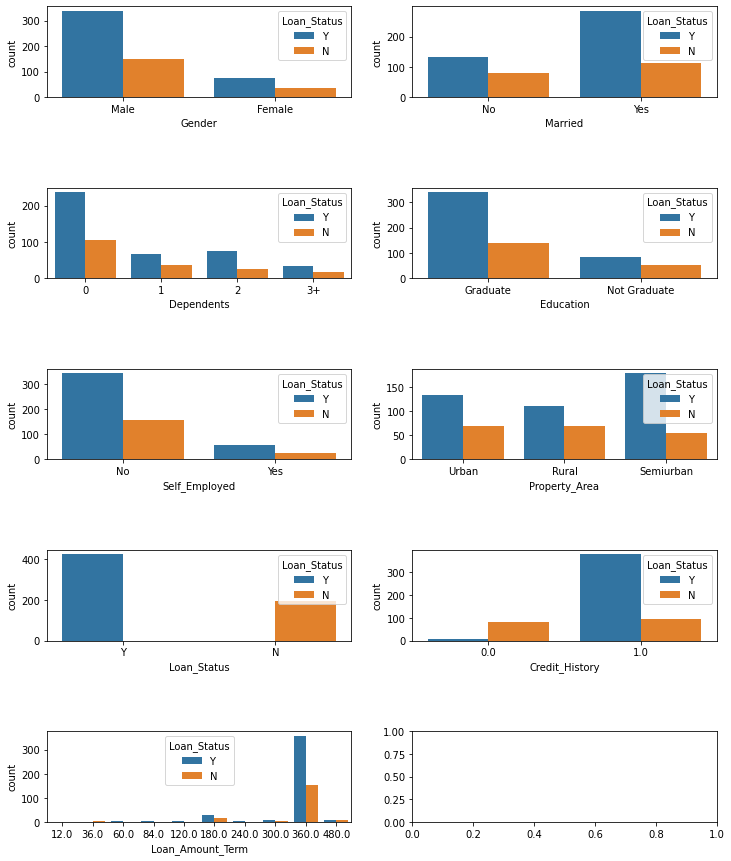

In [ ]:

cate_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(5,2,figsize=(12,15))
for idx,cat_col in enumerate(cate_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

Create custom function to plot stacked bar plot same as above

In [ ]:
def plot_stack(feature):
  tab = pd.crosstab(train[feature],train['Loan_Status'])
  tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
  return plt.show()

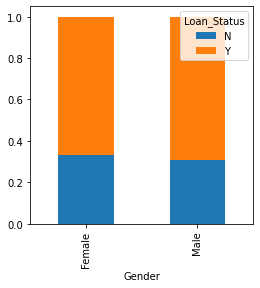

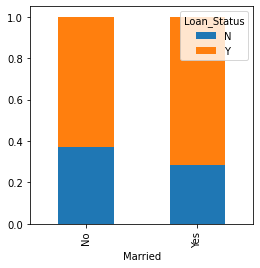

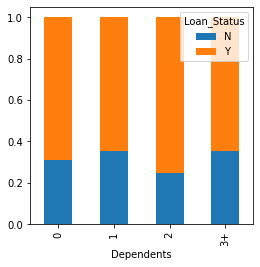

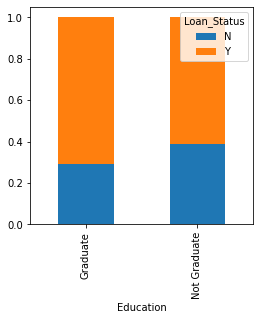

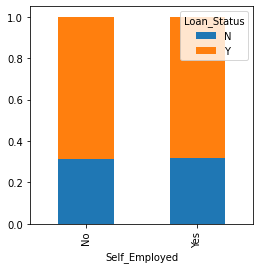

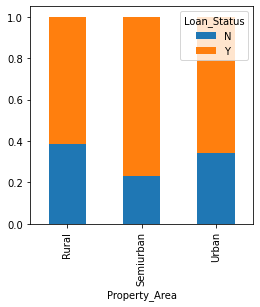

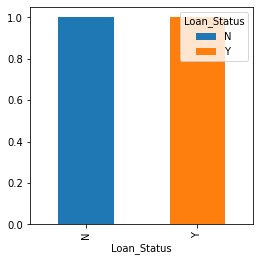

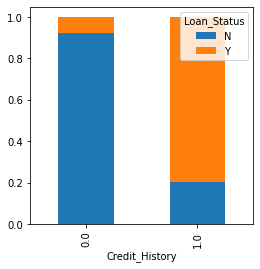

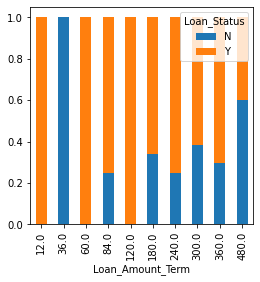

In [ ]:
for i in cate_columns:
  plot_stack(i)

Distribution and outliners

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


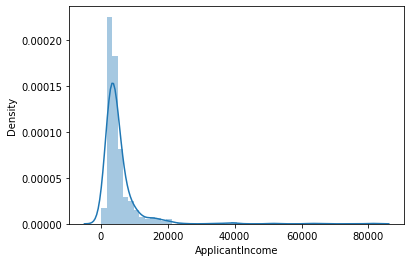

In [ ]:
sns.distplot(train['ApplicantIncome'])

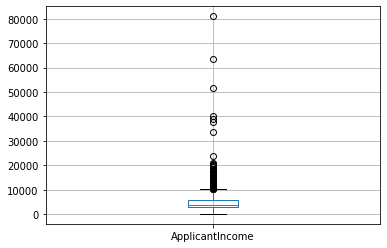

In [ ]:
train.boxplot(column='ApplicantIncome')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


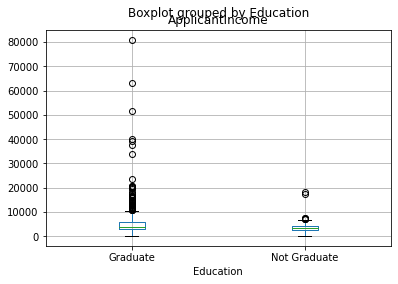

In [ ]:
train.boxplot(column='ApplicantIncome', by = 'Education') 

## Data Cleaning

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Encode

In [ ]:
# Encode Gender
train.Gender = train.Gender.map({'Male': 1, 'Female':0})
# Encode Married
train.Married = train.Married.map({'Yes':1,'No':0})
# Encode Dependents
train.Dependents = train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
# Encode Education
train.Education = train.Education.map({'Graduate':1, 'Not Graduate': 0})
# Encode Self_Employed
train.Self_Employed = train.Self_Employed.map({'Yes':1,'No':0})
# Encode Property_Area 
train.Property_Area = train.Property_Area.map({'Urban': 2, 'Semiurban':1, 'Rural':0})
# Encode Loan_Status 
train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0}).astype(int)


In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


Fill null values
- Numerical variables: imputation using mean or median
- Categorical variables: imputation using mode

In [ ]:
# Categorical variables
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

# Numerical variables
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [ ]:
# Drop Loan_ID
train.drop('Loan_ID',inplace=True,axis=1)

In [ ]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

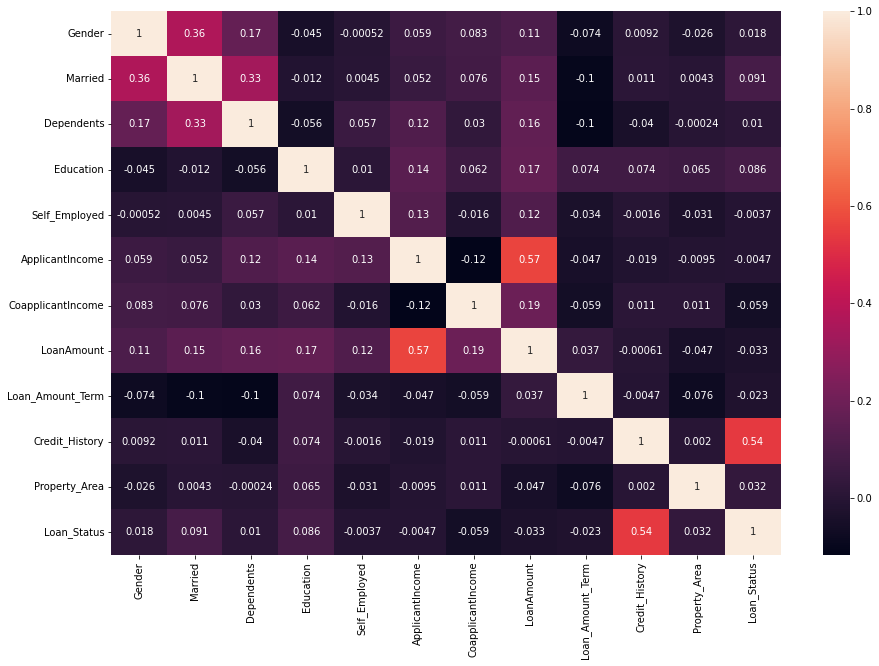

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(train.corr(),annot=True)
plt.show()

In [ ]:
# Sklearn requires the target variable in a separate variable which is Y. 
Y = train.Loan_Status
X = train.drop(['Loan_Status'], axis=1)

In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## Fit Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split training set (20% for testing set)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0,shuffle=True)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Create logistic regression MODEL
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
predicted= model.predict(X_test)

print(f"Accuracy score: {accuracy_score(Y_test,predicted)}")

cm = confusion_matrix(Y_test, predicted)
print(cm)

Accuracy score: 0.8130081300813008
[[17 21]
 [ 2 83]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
# Test an example 
t = model.predict([[0,0,0,1,0,2000,0,500,360,1,2]])
print(t)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
e = model.predict([[0.0,	0.0,	0.0,	1,	0.0,	700,	500.0,	54.0,	360.0,	0,	2]])
print(e)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## Fit the other models
- Logistic Regression
- Decision Tree
- Linear Discriminant Analysis
- Random Forest Classifier
- Support Vector Classifier
- KNeighbors Classifier
- Naive Bayes


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K-Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

print(models)

[('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()), ('Random Forest', RandomForestClassifier()), ('Support Vector Classifier', SVC()), ('K-Neirest Neighbour', KNeighborsClassifier()), ('Naive Bayes', GaussianNB())]


In [ ]:
def fit_model(models_list):
  names = []
  result_mean = []
  for name,model in models:
    kfold = KFold(n_splits=10)
    result = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    result_mean.append(result.mean())
    #print(model)
  return names,result_mean

In [ ]:
name,mean = fit_model(models)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Accuracy")
for index,name in enumerate(name):
  accu = mean[index]
  print(f"{name}: {accu}")

Accuracy
Logistic Regression: 0.808530612244898
Decision Tree: 0.6903265306122449
Linear Discriminant Analysis: 0.808530612244898
Random Forest: 0.788204081632653
Support Vector Classifier: 0.6840816326530613
K-Neirest Neighbour: 0.6313469387755102
Naive Bayes: 0.792204081632653


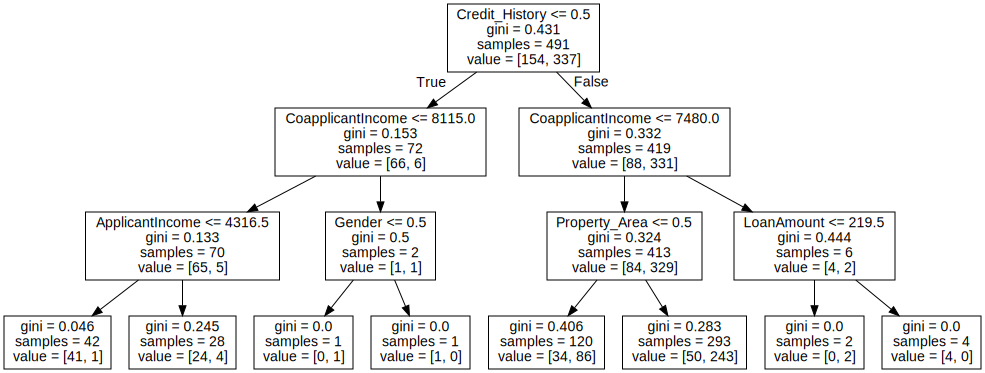

In [ ]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,Y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph